# Notebook 02: Descriptive Statistics

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.25)
%matplotlib inline

## Section 1: Accuracy

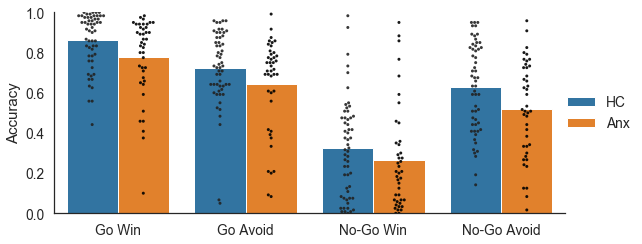

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data = read_csv('data.csv')

## GroupBy cue & diagnosis.
gb = data.groupby(['Cue','Diagnosis','Subject']).Accuracy.mean().reset_index()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(9,3.5))

## Plot.
sns.barplot('Cue', 'Accuracy', 'Diagnosis', data=gb, hue_order=['HC','Anx'], ci=None, ax=ax)
sns.swarmplot('Cue', 'Accuracy', 'Diagnosis', data=gb, hue_order=['HC','Anx'], dodge=True,
              size=3, color='k', alpha=0.9, ax=ax)

## Add info.
ax.set(xticklabels=('Go Win', 'Go Avoid', 'No-Go Win', 'No-Go Avoid'), xlabel='', ylim=(0,1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], loc=7, bbox_to_anchor=(1.15,0.5), frameon=False)

sns.despine()
plt.tight_layout()

## Section 2: Learning Curves

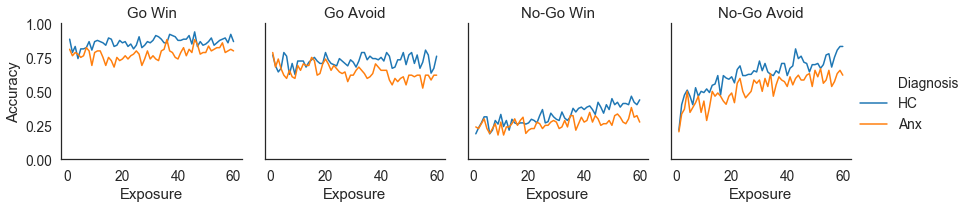

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data = read_csv('data.csv')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
g = sns.FacetGrid(data, col='Cue')

## Plot.
g.map(sns.lineplot, 'Exposure', 'Accuracy', 'Diagnosis', ci=None)

## Add info.
g.set(ylim=(0,1))
g.add_legend()
for ax, title in zip(g.axes.squeeze(), ['Go Win', 'Go Avoid', 'No-Go Win', 'No-Go Avoid']):
    ax.set_title(title)

## Section 3: Error Distribution

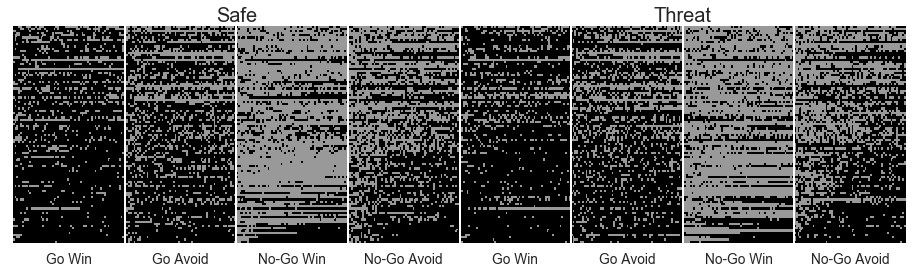

In [4]:
from matplotlib.colors import ListedColormap

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data = read_csv('data.csv')

## Reorganize data.
pivot = data.pivot_table(index='Subject', columns=('Condition','Cue','Exposure'), values='Accuracy').values

## Sort by accuracy.
pivot = pivot[np.argsort(pivot.mean(axis=1))]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(16,4))
cmap = ListedColormap(['0.6','0.0'])

## Plot heatmap.
sns.heatmap(pivot, cmap=cmap, xticklabels=[], yticklabels=[], cbar=False, ax=ax)

## Add info.
ax.vlines([60,120,180,240,300,360,420],0,pivot.shape[1], lw=2, color='w')
ax.set(xticks=np.arange(30,480,60), xticklabels=['Go Win','Go Avoid','No-Go Win','No-Go Avoid']*2)
ax.text(120,0,'Safe',ha='center',va='bottom',fontsize=20);
ax.text(360,0,'Threat',ha='center',va='bottom',fontsize=20);

## Clinical Measures

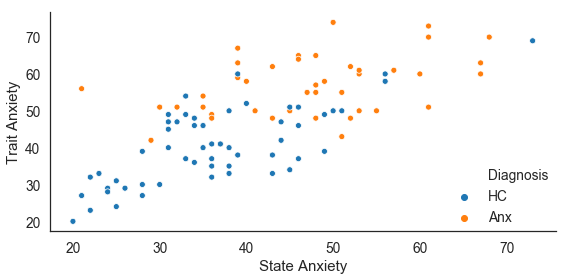

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data = read_csv('data.csv')

## GroupBy subject.
gb = data.groupby(['Diagnosis','Subject'])['State','Trait'].mean().reset_index()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Plot.
sns.scatterplot('State', 'Trait', 'Diagnosis', data=gb, hue_order=['HC','Anx'], ax=ax)

## Add info.
ax.set(xlabel='State Anxiety', ylabel='Trait Anxiety')
ax.legend(loc=4, frameon=False, borderpad=0, title=False)

sns.despine()
plt.tight_layout()